In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# ***Domain Knowledge***

***1)Illiterate - No Education whatsoever***

***2)Below Primary - People who have not completed the class 1 to 5 Schooling offically***

***3)Primary - Till Class 5 Schooling done***

***4)Middle - Class 6 to 8 Completed***

***5)Secondary - Class 9 and 10 completed***

***6)Higher Secondary - class 11 and class 12 completed***

***7)Graduate - People with graduate degree or higher***

In [2]:
State_df = pd.read_csv('SECC-EDU.csv')

In [3]:
State_df.columns

Index(['Zone', 'State Name', 'Total Population', '1 = No. of Illiterates',
       '% 1 = Illiterates', '2 = No. of Literates but below primary',
       '% 2 = Literates but below primary', '3 = No. of Primary',
       '% 3 = Primary', '4 = No. of Middle', '% 4 = Middle',
       '5 = No. of Secondary', '% 5 = Secondary',
       '6 = No. of Higher Secondary', '% 6 = Higher Secondary',
       '7 = No. of Graduate or Higher', '% 7 = Graduate or Higher',
       '8 = No. of Other (Specify)', '% 8 = Other (Specify)'],
      dtype='object')

In [4]:
State_df.shape

(44, 19)

In [5]:
State_df.head(44)

,Zone,State Name,Total Population,1 = No. of Illiterates,% 1 = Illiterates,2 = No. of Literates but below primary,% 2 = Literates but below primary,3 = No. of Primary,% 3 = Primary,4 = No. of Middle,% 4 = Middle,5 = No. of Secondary,% 5 = Secondary,6 = No. of Higher Secondary,% 6 = Higher Secondary,7 = No. of Graduate or Higher,% 7 = Graduate or Higher,8 = No. of Other (Specify),% 8 = Other (Specify)
0,All India,NaN,886692406,316795697,35.73%,123835207,13.97%,157572788,17.77%,119909955,13.52%,85021861,9.59%,48018733,5.42%,30589123,3.45%,4744685,0.54%
1,North Total,NaN,47662769,15663982,32.86%,4976876,10.44%,7640609,16.03%,6669481,13.99%,6633303,13.92%,3984533,8.36%,1767999,3.71%,325371,0.68%
2,North,JAMMU & KASHMIR (01),8822753,3487110,39.52%,891698,10.11%,1176404,13.33%,1366971,15.49%,1021889,11.58%,537446,6.09%,285884,3.24%,55041,0.62%
3,North,HIMACHAL PRADESH (02),5940056,1309180,22.04%,597483,10.06%,1044664,17.59%,905113,15.24%,1052768,17.72%,677185,11.4%,309059,5.2%,44562,0.75%
4,North,PUNJAB (03),16864339,5372292,31.86%,1664615,9.87%,2918580,17.31%,2323743,13.78%,2522688,14.96%,1442005,8.55%,509388,3.02%,111026,0.66%
5,North,HARYANA (06),16035621,5495400,34.27%,1823080,11.37%,2500961,15.6%,2073654,12.93%,2035958,12.7%,1327897,8.28%,663668,4.14%,114742,0.72%
6,East Total,NaN,233233971,90559817,38.83%,38103502,16.34%,41374578,17.74%,31825480,13.65%,16348595,7.01%,8403367,3.6%,5734233,2.46%,755619,0.32%
7,East,BIHAR (10),98552478,43288391,43.92%,19460299,19.75%,14816264,15.03%,8659293,8.79%,6207898,6.3%,3566411,3.62%,2239524,2.27%,223115,0.23%
8,East,WEST BENGAL (19),70768255,23760612,33.58%,9350688,13.21%,14347935,20.27%,13872724,19.6%,4847199,6.85%,2448743,3.46%,1892823,2.67%,245697,0.35%
9,East,JHARKHAND (20),27397111,10764670,39.29%,4269951,15.59%,5053533,18.45%,3565212,13.01%,1998765,7.3%,1062210,3.88%,583523,2.13%,64336,0.23%


# ***Feature Engineering and Feature Construction***

***Dividing the original dataframe into two sub-dataframes based on Area/Size of demographic area....i.e; State and Region-wise***

In [6]:
Demographic_df = State_df.iloc[[0,1,6,11,16,22,27,36],:].drop(columns=['State Name'])

In [7]:
State_df = State_df.drop([0,1,6,11,16,22,36,27],axis=0)

In [8]:
Demographic_df

,Zone,Total Population,1 = No. of Illiterates,% 1 = Illiterates,2 = No. of Literates but below primary,% 2 = Literates but below primary,3 = No. of Primary,% 3 = Primary,4 = No. of Middle,% 4 = Middle,5 = No. of Secondary,% 5 = Secondary,6 = No. of Higher Secondary,% 6 = Higher Secondary,7 = No. of Graduate or Higher,% 7 = Graduate or Higher,8 = No. of Other (Specify),% 8 = Other (Specify)
0,All India,886692406,316795697,35.73%,123835207,13.97%,157572788,17.77%,119909955,13.52%,85021861,9.59%,48018733,5.42%,30589123,3.45%,4744685,0.54%
1,North Total,47662769,15663982,32.86%,4976876,10.44%,7640609,16.03%,6669481,13.99%,6633303,13.92%,3984533,8.36%,1767999,3.71%,325371,0.68%
6,East Total,233233971,90559817,38.83%,38103502,16.34%,41374578,17.74%,31825480,13.65%,16348595,7.01%,8403367,3.6%,5734233,2.46%,755619,0.32%
11,West Total,153880989,54036317,35.12%,19947937,12.96%,29365665,19.08%,18048064,11.73%,16899356,10.98%,9299378,6.04%,5388712,3.5%,893395,0.58%
16,South Total,164522575,48732413,29.62%,17632797,10.72%,30129243,18.31%,24403832,14.83%,22089112,13.43%,11353019,6.9%,8330064,5.06%,1844813,1.12%
22,Central Total,241269206,94529073,39.18%,37449064,15.52%,39677576,16.45%,30025356,12.44%,18657451,7.73%,12330887,5.11%,7793219,3.23%,742811,0.31%
27,North Eastern Total,39794232,12306406,30.93%,5172458,13%,8214516,20.64%,7733990,19.43%,3314439,8.33%,1906983,4.79%,1003785,2.52%,140202,0.35%
36,UT Total,6328664,967689,15.29%,552573,8.73%,1170601,18.5%,1203752,19.02%,1079605,17.06%,740566,11.7%,571111,9.02%,42474,0.67%


***Renaming the columns for better understanding***

In [9]:
State_df = State_df.rename(columns={
    'Zone': 'zone',
    'State Name': 'state',
    'Total Population': 'total_population',

    '1 = No. of Illiterates': 'illiterate_count',
    '% 1 = Illiterates': 'illiterate_pct',

    '2 = No. of Literates but below primary': 'below_primary_count',
    '% 2 = Literates but below primary': 'below_primary_pct',

    '3 = No. of Primary': 'primary_count',
    '% 3 = Primary': 'primary_pct',

    '4 = No. of Middle': 'middle_count',
    '% 4 = Middle': 'middle_pct',

    '5 = No. of Secondary': 'secondary_count',
    '% 5 = Secondary': 'secondary_pct',

    '6 = No. of Higher Secondary': 'higher_secondary_count',
    '% 6 = Higher Secondary': 'higher_secondary_pct',

    '7 = No. of Graduate or Higher': 'graduate_plus_count',
    '% 7 = Graduate or Higher': 'graduate_plus_pct',

    '8 = No. of Other (Specify)': 'other_count',
    '% 8 = Other (Specify)': 'other_pct'
})
Demographic_df = Demographic_df.rename(columns={
    'Zone': 'zone',
    'Total Population': 'total_population',

    '1 = No. of Illiterates': 'illiterate_count',
    '% 1 = Illiterates': 'illiterate_pct',

    '2 = No. of Literates but below primary': 'below_primary_count',
    '% 2 = Literates but below primary': 'below_primary_pct',

    '3 = No. of Primary': 'primary_count',
    '% 3 = Primary': 'primary_pct',

    '4 = No. of Middle': 'middle_count',
    '% 4 = Middle': 'middle_pct',

    '5 = No. of Secondary': 'secondary_count',
    '% 5 = Secondary': 'secondary_pct',

    '6 = No. of Higher Secondary': 'higher_secondary_count',
    '% 6 = Higher Secondary': 'higher_secondary_pct',

    '7 = No. of Graduate or Higher': 'graduate_plus_count',
    '% 7 = Graduate or Higher': 'graduate_plus_pct',

    '8 = No. of Other (Specify)': 'other_count',
    '% 8 = Other (Specify)': 'other_pct'
})

In [10]:
pct_cols = ['illiterate_pct','below_primary_pct','primary_pct','middle_pct','secondary_pct','higher_secondary_pct','graduate_plus_pct','other_pct']
for col in pct_cols:
    State_df[col] = State_df[col].str.replace('%', '', regex=False).astype(float)
    Demographic_df[col] = Demographic_df[col].str.replace('%', '', regex=False).astype(float)

In [11]:
State_df.head(2)

,zone,state,total_population,illiterate_count,illiterate_pct,below_primary_count,below_primary_pct,primary_count,primary_pct,middle_count,middle_pct,secondary_count,secondary_pct,higher_secondary_count,higher_secondary_pct,graduate_plus_count,graduate_plus_pct,other_count,other_pct
2,North,JAMMU & KASHMIR (01),8822753,3487110,39.52,891698,10.11,1176404,13.33,1366971,15.49,1021889,11.58,537446,6.09,285884,3.24,55041,0.62
3,North,HIMACHAL PRADESH (02),5940056,1309180,22.04,597483,10.06,1044664,17.59,905113,15.24,1052768,17.72,677185,11.40,309059,5.20,44562,0.75


In [12]:
Demographic_df.head()

,zone,total_population,illiterate_count,illiterate_pct,below_primary_count,below_primary_pct,primary_count,primary_pct,middle_count,middle_pct,secondary_count,secondary_pct,higher_secondary_count,higher_secondary_pct,graduate_plus_count,graduate_plus_pct,other_count,other_pct
0,All India,886692406,316795697,35.73,123835207,13.97,157572788,17.77,119909955,13.52,85021861,9.59,48018733,5.42,30589123,3.45,4744685,0.54
1,North Total,47662769,15663982,32.86,4976876,10.44,7640609,16.03,6669481,13.99,6633303,13.92,3984533,8.36,1767999,3.71,325371,0.68
6,East Total,233233971,90559817,38.83,38103502,16.34,41374578,17.74,31825480,13.65,16348595,7.01,8403367,3.60,5734233,2.46,755619,0.32
11,West Total,153880989,54036317,35.12,19947937,12.96,29365665,19.08,18048064,11.73,16899356,10.98,9299378,6.04,5388712,3.50,893395,0.58
16,South Total,164522575,48732413,29.62,17632797,10.72,30129243,18.31,24403832,14.83,22089112,13.43,11353019,6.90,8330064,5.06,1844813,1.12


# ***Statistical Information***

In [13]:
State_df.describe()

,total_population,illiterate_count,illiterate_pct,below_primary_count,below_primary_pct,primary_count,primary_pct,middle_count,middle_pct,secondary_count,secondary_pct,higher_secondary_count,higher_secondary_pct,graduate_plus_count,graduate_plus_pct,other_count,other_pct
count,3.600000e+01,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000
mean,2.463034e+07,8.799880e+06,29.663056,3.439867e+06,12.256944,4.377022e+06,18.628611,3.330832e+06,15.908611,2.361718e+06,11.916944,1.333854e+06,6.662500,8.496979e+05,4.268056,131796.805556,0.688611
std,3.378574e+07,1.325909e+07,9.745254,5.379277e+06,3.595860,5.791896e+06,3.551641,4.407085e+06,4.114866,2.946658e+06,4.725193,1.753991e+06,2.835221,1.166418e+06,2.215540,168890.114483,0.487496
min,6.401000e+04,5.953000e+03,9.300000,5.641000e+03,5.790000,9.816000e+03,13.330000,9.750000e+03,8.790000,9.879000e+03,6.080000,6.408000e+03,2.950000,3.491000e+03,1.810000,272.000000,0.050000
25%,1.002459e+06,3.325890e+05,22.047500,1.228280e+05,9.652500,1.576338e+05,16.307500,1.873048e+05,12.990000,1.130695e+05,8.247500,6.065375e+04,4.395000,4.657150e+04,2.707500,7873.500000,0.357500
50%,1.242919e+07,3.293350e+06,31.280000,1.313884e+06,11.990000,1.928296e+06,18.020000,1.720312e+06,15.365000,1.156613e+06,10.790000,8.148465e+05,5.900000,4.567130e+05,3.510000,57573.000000,0.570000
75%,3.617812e+07,1.108393e+07,37.962500,4.375204e+06,14.862500,7.235236e+06,20.647500,5.313614e+06,19.730000,3.402747e+06,15.012500,1.752646e+06,8.557500,1.177183e+06,5.515000,223394.500000,0.762500
max,1.627787e+08,6.209296e+07,47.580000,2.488570e+07,19.920000,2.722152e+07,27.990000,2.084898e+07,23.610000,1.289274e+07,23.020000,8.459145e+06,12.410000,5.797761e+06,9.620000,631390.000000,1.990000


# ***Univariate analysis***

# ***State total Population***
***1)Highly Right skewed-India’s population is concentrated in a few large states, while most states have comparatively smaller populations.***

***2)Up and Bihar are the states with the most amount of population***

In [14]:
State_df['total_population'].skew()

np.float64(2.388675330073269)

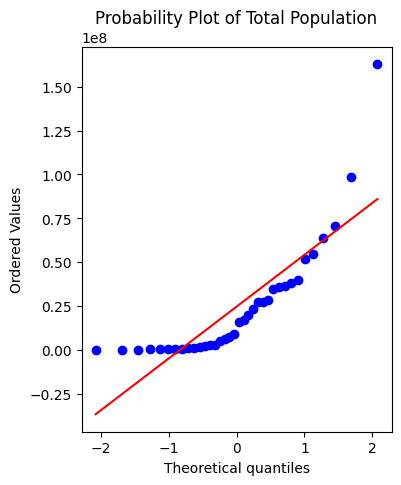

In [15]:
plt.figure(figsize=(4,5))
stats.probplot(State_df['total_population'], dist='norm', plot=plt)
plt.title('Probability Plot of Total Population')
plt.show()

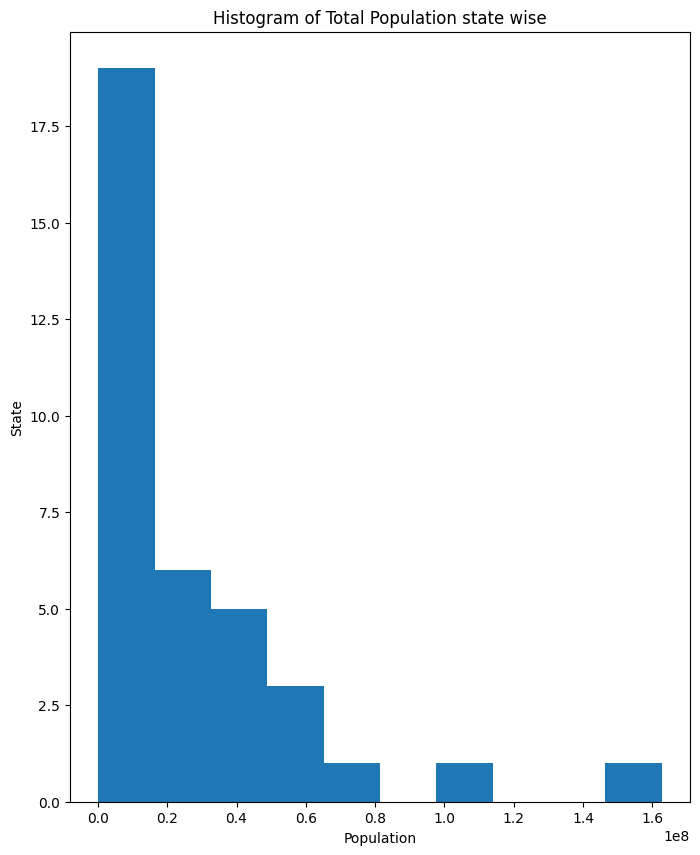

In [16]:
plt.figure(figsize=(8,10))
State_df['total_population'].sort_values().plot(kind='hist')
plt.title('Histogram of Total Population state wise')
plt.xlabel("Population")
plt.ylabel("State")
plt.show()

<Axes: ylabel='state'>

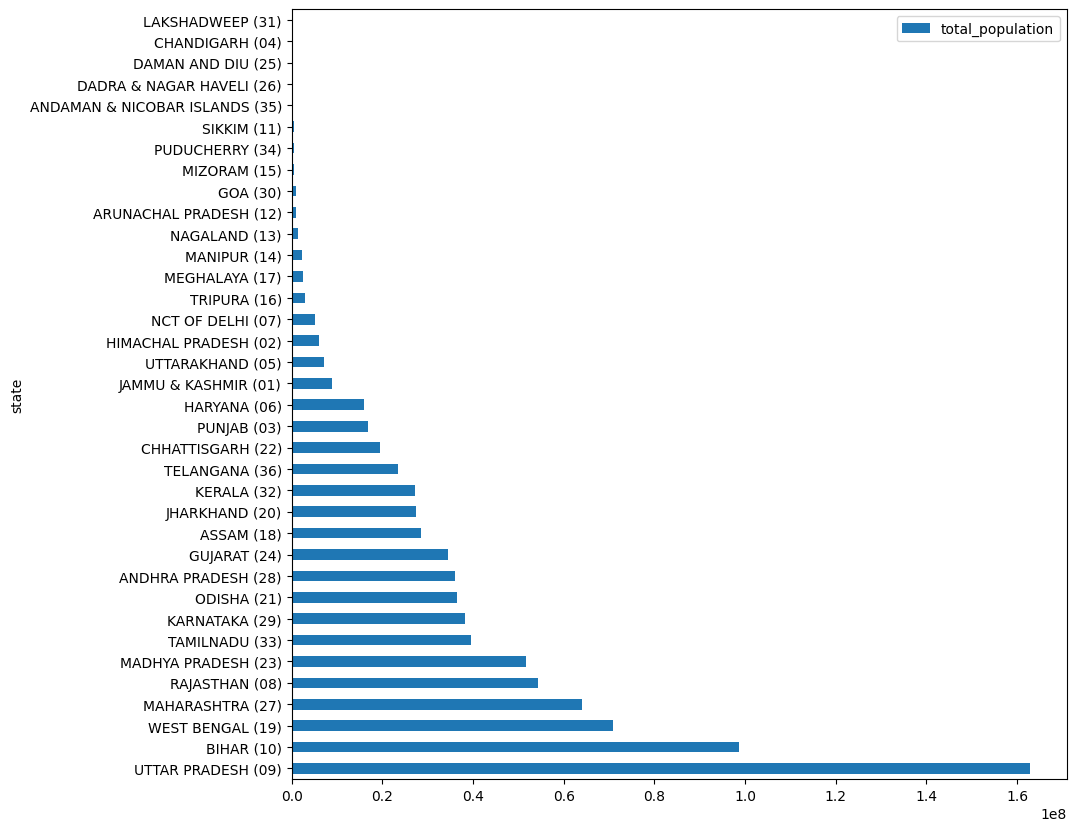

In [17]:
State_df[['total_population','state']].sort_values(by='total_population', ascending=False).plot(kind='barh', x='state', y='total_population', figsize=(10,10))

# ***Illiterate Count***
***1)As expected, the states with largest popuation also have largest Illiterate counts and for the same reason this column is also heavily right-skewed***

***2)The Illiterate population of a typicall state is 3293350.5***

<Axes: ylabel='state'>

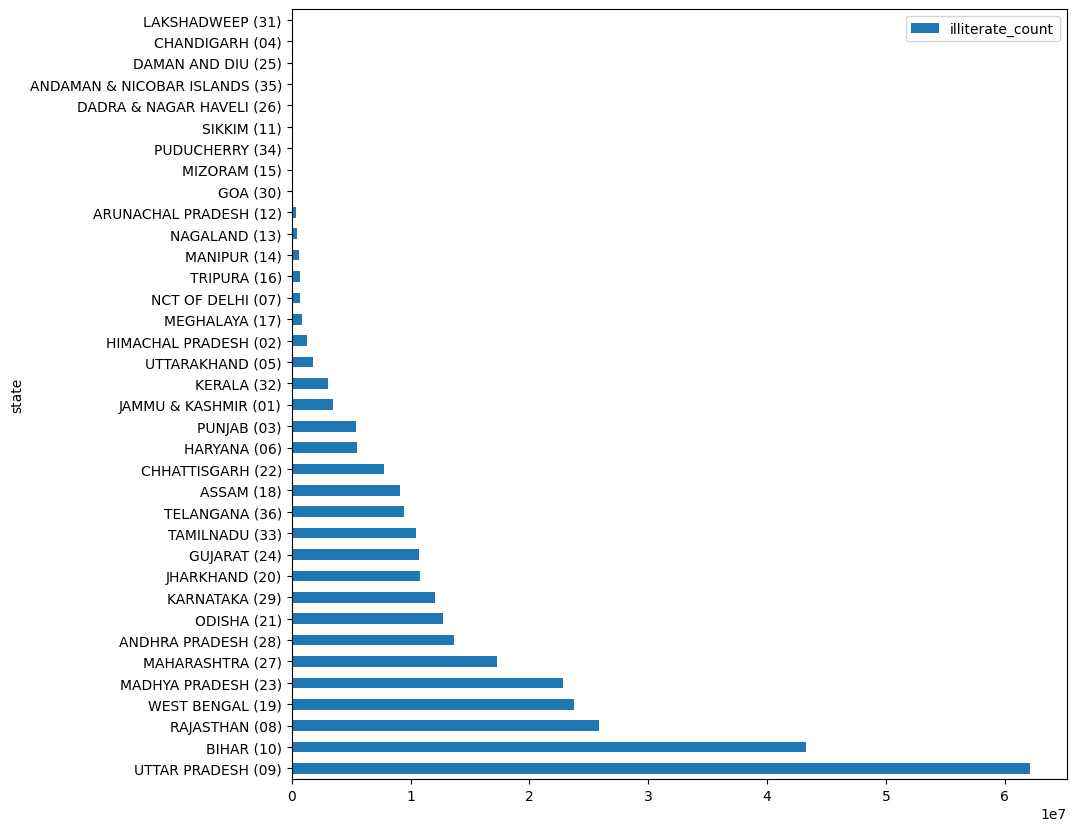

In [18]:
State_df[['illiterate_count','state']].sort_values(by='illiterate_count', ascending=False).plot(kind='barh', x='state', y='illiterate_count', figsize=(10,10))

In [19]:
State_df['illiterate_count'].median()

3293350.5

# ***Literate Population***

***Literate Count VS Literate Percentage***

***1)From both the graphs we can clearly say that the literate count is influnced by the Population. Example: UP has the highest literate popuation but it's literacy percentage is relatively lower than many other states***

***2]Graduate percentage reflects actual education of every state and not the Graduate population count***

<Axes: xlabel='state'>

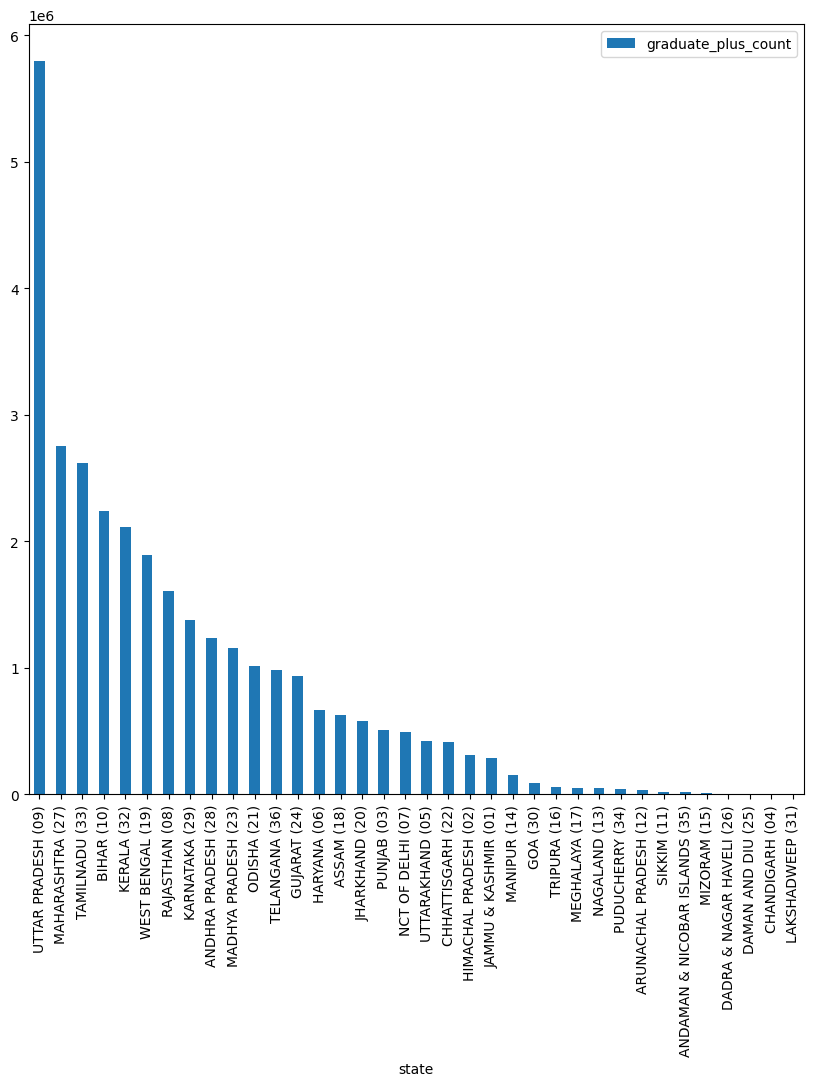

In [20]:
State_df[['state','graduate_plus_count']].sort_values(by='graduate_plus_count', ascending=False).plot(kind='bar',x='state', y='graduate_plus_count', figsize=(10,10))

<Axes: xlabel='state'>

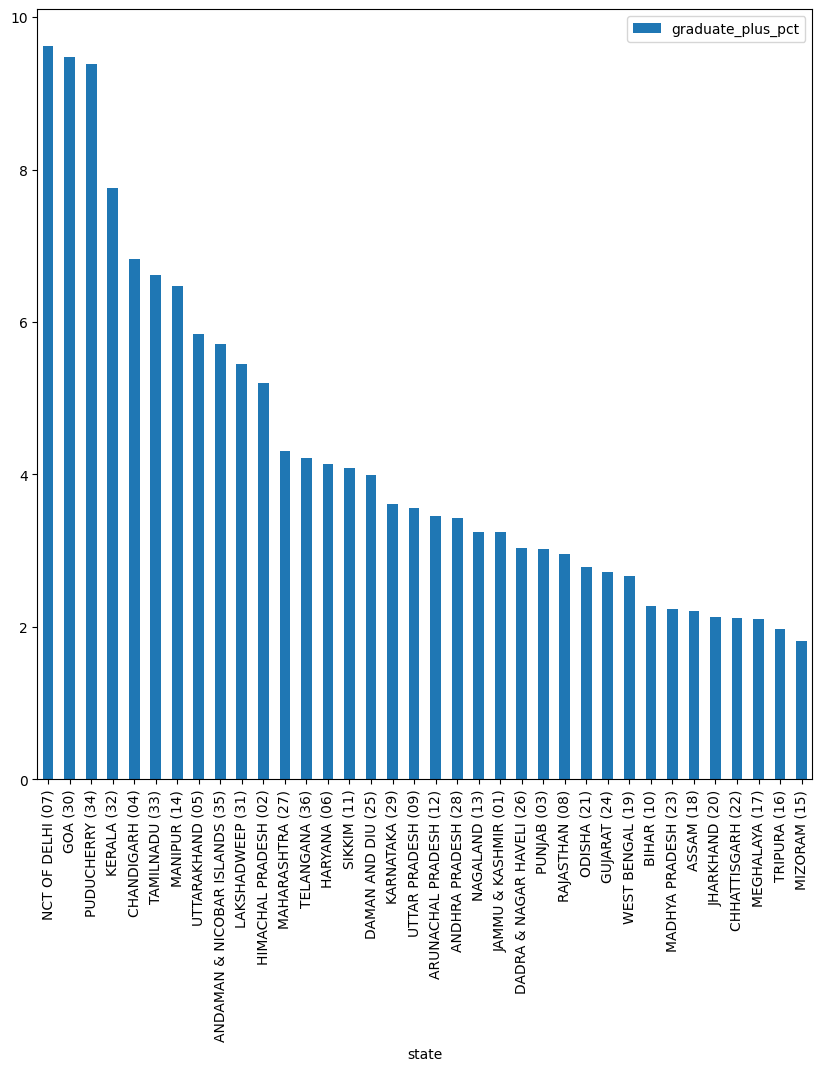

In [21]:
State_df[['state','graduate_plus_pct']].sort_values(by='graduate_plus_pct', ascending=False).plot(kind='bar',x='state', y='graduate_plus_pct', figsize=(10,10))

# ***Bivariate Analysis***

***Relationship between Total Population of any State and it's Graduate Percentage and Illiteracy percentage***

***1)We can see that there is no linear relationship between population and graduate percentage or Illiterate percentage***

***2)So we can say that Population size in most of the cases has no influence on the Literate or Illiterate percentage but in some cases Like UP and Bihar it is an Exception***

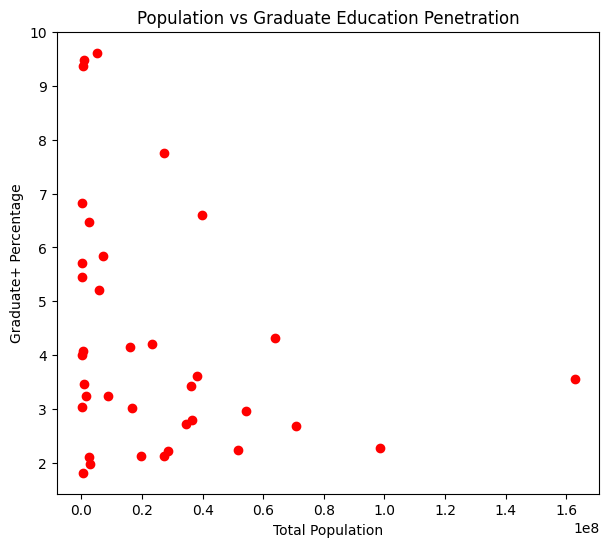

In [29]:
plt.figure(figsize=(7,6))
plt.scatter(State_df['total_population'], State_df['graduate_plus_pct'], color='red')
plt.xlabel("Total Population")
plt.ylabel("Graduate+ Percentage")
plt.title("Population vs Graduate Education Penetration")
plt.show()

***Relationship between Total Population of any State and it's Illiterate Percentage***

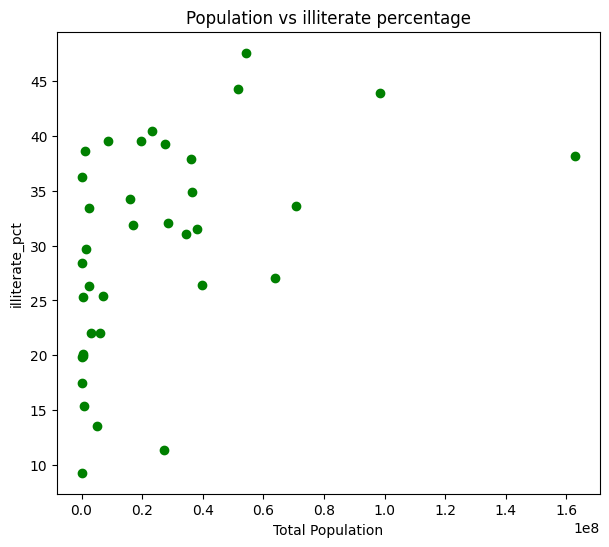

In [27]:
plt.figure(figsize=(7,6))
plt.scatter(State_df['total_population'], State_df['illiterate_pct'], color='green')
plt.xlabel("Total Population")
plt.ylabel("illiterate_pct")
plt.title("Population vs illiterate percentage")
plt.show()

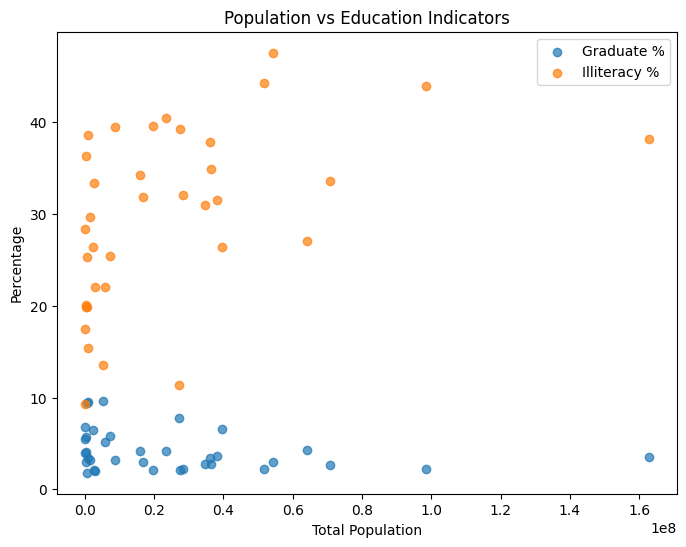

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(State_df['total_population'], State_df['graduate_plus_pct'], label='Graduate %', alpha=0.7)
plt.scatter(State_df['total_population'], State_df['illiterate_pct'], label='Illiteracy %', alpha=0.7)
plt.xlabel("Total Population")
plt.ylabel("Percentage")
plt.title("Population vs Education Indicators")
plt.legend()
plt.show()


***Zone-wise Average graduate percentage***

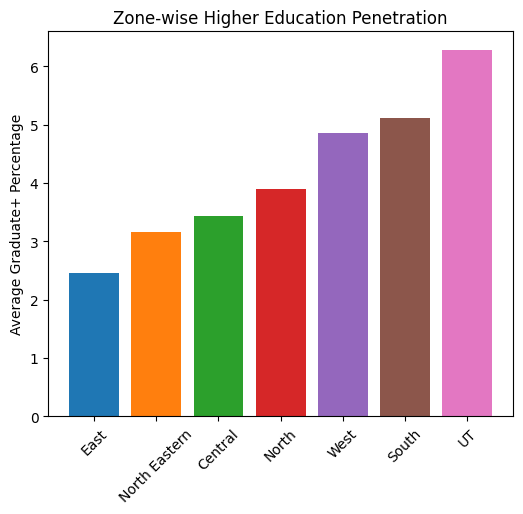

In [33]:
zone_grad = State_df.groupby('zone')['graduate_plus_pct'].mean().sort_values()
colors = plt.cm.tab10(range(len(zone_grad)))
plt.figure(figsize=(6,5))
plt.bar(zone_grad.index, zone_grad.values, color=colors)
plt.ylabel("Average Graduate+ Percentage")
plt.title("Zone-wise Higher Education Penetration")
plt.xticks(rotation=45)
plt.show()

***Secondary vs Higher Secondary***

***strong positive relationship between secondary and higher secondary education completion rates, indicating that states with strong school retention systems are also more successful in transitioning students to higher secondary education.***

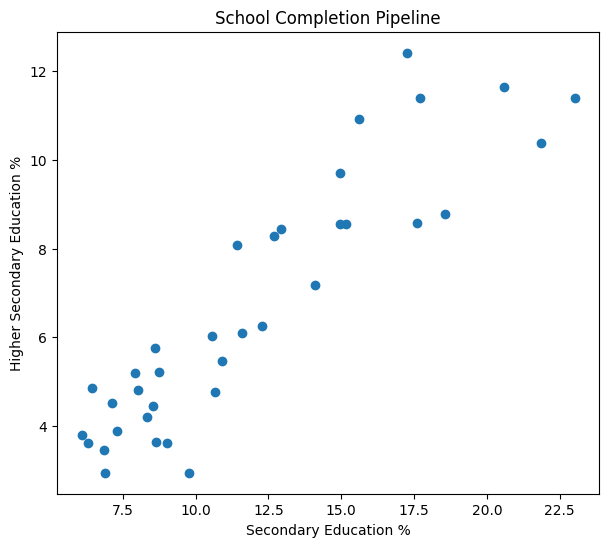

In [35]:
plt.figure(figsize=(7,6))
plt.scatter(State_df['secondary_pct'], State_df['higher_secondary_pct'])
plt.xlabel("Secondary Education %")
plt.ylabel("Higher Secondary Education %")
plt.title("School Completion Pipeline")
plt.show()